# Newton-Cotes
# (Regla del rectángulo / Regla del trapecio y Simpson)
## Ejercicio 3

Aproximar el valor de la integral $\int_0^{\pi}sin(x)dx = 2$ con reglas compuestas del rectángulo y trapecio con un número de subintervalos $n \in \{1,10,20,30,40 \}$ y hacer gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal).

**Nota**: Los siguientes ejercicios están basados en las notas de clase disponibles en (https://github.com/ITAM-DS/Propedeutico/tree/master/Python/clases/2_calculo_DeI) y en el capítulo 6 del libro Numerical Methods in Engineering with Python 3 (Kiusalaas, 2013).

In [1]:
import numpy as np
from numpy import absolute
import math
from math import sin, pi, log
np.set_printoptions(precision=16) # precisión de floats en numpy

El área sombreada que se quiere aproximar es igual a 2.


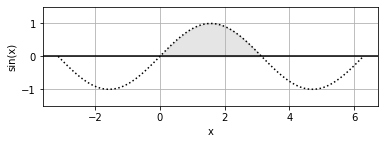

In [3]:
import matplotlib.pyplot as plt

print('El área sombreada que se quiere aproximar es igual a 2.')
# Función original y área que se quiere aproximar
pi_val = math.pi
x_aux = np.arange(-pi_val, 2*pi_val, 0.1)
f_ori = lambda  x: np.sin(x)

# Subgráfico 2 para mostrar el error relativo
plt.subplot(2,1,1)

plt.plot(x_aux, f_ori(x_aux), 'k:')
plt.axhline(color = 'black')
plt.fill_between(x_aux, f_ori(x_aux), where = [(x>=0) and (x<=pi) for x in x_aux], color = 'grey', alpha = 0.2)
plt.xlabel('x'); plt.ylabel('sin(x)')
axes = plt.gca(); axes.set_ylim([-1.5,1.5])

plt.grid(True)

plt.show()

# Regla del rectángulo compuesta
En la regla del rectángulo compuesto se define el área total aproximada, $I$, debajo de la función $f(x)$ en el intervalo $\left[a,b\right]$, como la sumatoria de las áreas ($I_{i}$), de $n$ subpáneles rectangulares de espaciado $h=\frac{b-a}{n}$:
$$
I=\sum_{i=0}^{n-1}I_{i}
$$
donde el área del subpanel $i$, correspondiente a $I_{i}$, se define como:
$$
I_{i}=hf\left(x_{i}\right)
$$
Donde $x_{i}$, es el nodo $i$, con $i=0,1,\ldots,n$. Note que $x_{0}=a$, y $x_{n}=b$.
<br><br>

In [2]:
# Crear una función para la regla del rectangulo (compuesta):
def rec_vec(f, a, b, n): # fun: f(x), a, b: del intervalo [a,b]
    h = float((b-a)/n) # definimos espaciado igual entre nodos - que sea float
    area = 0
    for i in range(0, n):
            area_i = (f(h*i)*(h)) # area de cada panel
            # print(f"El área del panel {i} en este paso es {area_i}")
            area = area + area_i
    return area

In [3]:
# Errores
def err_int(area, area_ast):
    err_abs = absolute(area-area_ast) # error abs
    err_rel = err_abs/absolute(area_ast) # error rel
    return err_abs, err_rel

In [4]:
# test
fun = sin # f(x)
a, b = [0, pi] # puntos del intervalo [a,b]
n = 40 # paneles
area_ast = 2

aprox_area = rec_vec(fun, a, b, n)
err_abs_t, err_rel_t = err_int(aprox_area, area_ast)

print(f"El área aproximada por el método de la regla del trapecio compuesto con {n} paneles es {aprox_area}")
print(f"El valor exacto del área es {area_ast} y el error absoluto de la aproximación es {err_abs_t}")
print(f"El error relativo de la aproximación es {err_rel_t}")

El área aproximada por el método de la regla del trapecio compuesto con 40 paneles es 1.998971810497066
El valor exacto del área es 2 y el error absoluto de la aproximación es 0.0010281895029340404
El error relativo de la aproximación es 0.0005140947514670202


**Obs:** Para $n=1$, da un area de 0, lo cual tiene sentido dado que el "rectangulo" creado es una línea, y por tanto no tiene área.

In [25]:
# Desarrollo del ejercicio para la regla compuesta del rectángulo
fun = sin # f(x)
a, b = [0, pi] # puntos del intervalo [a,b]
n = [1, 10, 20, 30, 40] #,20,30,40
area_ast = 2

aprox_rec = np.empty([len(n),1]) 
err_rec = np.empty([len(n), 2])
pos = 0
for z in n:
    aprox_list_z = rec_vec(fun, a, b, z)
    aprox_rec[pos] = aprox_list_z
    err_ab, err_re = err_int(aprox_list_z, area_ast)
    err_rec[pos, :] = err_ab, err_re
    pos += 1 

print('-'*5, 'Resultados del ejercicio', '-'*5); print('-'*30)
print(f"El valor exacto del área es {area_ast}"); 
print('n:', n);
print('Aroximación por la Regla del rectángulo compuesta', aprox_rec)
print('Errores absolutos', err_rec[:,0]); 
print('Errores relativos', err_rec[:,1])
print('-'*30)
print(aprox_rec)

----- Resultados del ejercicio -----
------------------------------
El valor exacto del área es 2
n: [1, 10, 20, 30, 40]
Aroximación por la Regla del rectángulo compuesta [[0.                ]
 [1.9835235375094544]
 [1.9958859727087146]
 [1.9981719613436544]
 [1.998971810497066 ]]
Errores absolutos [2.0000000000000000e+00 1.6476462490545574e-02 4.1140272912854048e-03
 1.8280386563456208e-03 1.0281895029340404e-03]
Errores relativos [1.0000000000000000e+00 8.2382312452727868e-03 2.0570136456427024e-03
 9.1401932817281040e-04 5.1409475146702022e-04]
------------------------------
[[0.                ]
 [1.9835235375094544]
 [1.9958859727087146]
 [1.9981719613436544]
 [1.998971810497066 ]]


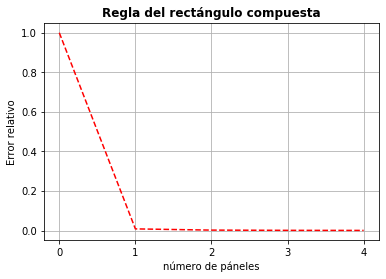

In [27]:
# Grafica: error relativo vs número de páneles
import matplotlib.pyplot as plt

plt.plot(err_rec[:,1], 'r--')
plt.xlabel('número de páneles'); plt.ylabel('Error relativo')
plt.title('Regla del rectángulo compuesta', fontweight="bold")
plt.xticks(np.arange(0, 5, step=1))
plt.grid(True)

plt.show()

# Regla del Trapecio compuesto

En la regla del Trapecio compuesto se define el área total aproximada, $I$, debajo de la función $f(x)$ en el intervalo $\left[a,b\right]$, como la sumatoria de las áreas ($I_{i}$), de $n$ subpáneles trapezoidales de espaciado $h=\frac{b-a}{n}$:
$$
I=\sum_{i=0}^{n-1}I_{i}
$$
donde el área del subpanel $i$, correspondiente a $I_{i}$, se define como:
$$
I_{i}=\frac{h}{2}\left[f\left(x_{i}\right)+f\left(x_{i+1}\right)\right]
$$
Donde $x_{i}$, es el nodo $i$, con $i=0,1,\ldots,n$. Note que $x_{0}=a$, y $x_{n}=b$.
<br><br>
A continuación se crea la función "trap_comp", que computa la regla compuesta del trapecio, incorporando los parámetros f, a, b y n, correspondientes a la función $f(x)$ a aproximar, los elementos del intervalo $\left[a,b\right]$, y el número de páneles deseados, respectivamente. 
Note que para el caso de un subpanel ($n = 1$), no es necesario iterar.


In [28]:
# Crear una función para la regla compuesta del trapecio
def trap_comp_vec(f, a, b, n): # fun: f(x), a, b: del intervalo [a,b], n: número de páneles
    h = float((b-a)/n) # definimos espaciado igual entre nodos - que sea float
    area = 0
    for i in range(0, n):
            area_i = (h/2)*(f(h*i) + f(h*(i+1))) # area de cada panel
            # print(f"El área del panel {i} en este paso es {area_i}")
            area = area + area_i
    return area


In [29]:
# test
fun = sin # f(x)
a, b = [0, pi] # puntos del intervalo [a,b]
n = 16 # paneles
area_ast = 2

aprox_area = trap_comp_vec(fun, a, b, n)
err_abs_t, err_rel_t = err_int(aprox_area, area_ast)

print(f"El área aproximada por el método de la regla del trapecio compuesto con {n} paneles es {aprox_area}")
print(f"El valor exacto del área es {area_ast} y el error absoluto de la aproximación es {err_abs_t}")
print(f"El error relativo de la aproximación es {err_rel_t}")

El área aproximada por el método de la regla del trapecio compuesto con 16 paneles es 1.993570343772339
El valor exacto del área es 2 y el error absoluto de la aproximación es 0.006429656227660896
El error relativo de la aproximación es 0.003214828113830448


In [30]:
# Desarrollo del ejercicio
fun = sin # f(x)
a, b = [0, pi] # puntos del intervalo [a,b]
n = [1,10,20,30,40]
area_ast = 2

aprox_tra = np.empty([len(n),1]) 
err_tra = np.empty([len(n), 2])

pos = 0
for z in n:
    aprox_list_z = trap_comp_vec(fun, a, b, z)
    aprox_tra[pos] = aprox_list_z
    err_ab, err_re = err_int(aprox_list_z,area_ast)
    err_tra[pos, :] = err_ab, err_re
    pos += 1

print('-'*5, 'Resultados del ejercicio', '-'*5); print('-'*30)
print(f"El valor exacto del área es {area_ast}"); 
print('n:', n);
print('Aroximación por la Regla del rectángulo compuesta', aprox_tra[:,0])
print('Errores absolutos', err_tra[:,0]); 
print('Errores relativos', err_tra[:,1])
print('-'*30)

----- Resultados del ejercicio -----
------------------------------
El valor exacto del área es 2
n: [1, 10, 20, 30, 40]
Aroximación por la Regla del rectángulo compuesta [1.9236706937217898e-16 1.9835235375094546e+00 1.9958859727087146e+00
 1.9981719613436542e+00 1.9989718104970657e+00]
Errores absolutos [1.9999999999999998e+00 1.6476462490545352e-02 4.1140272912854048e-03
 1.8280386563458428e-03 1.0281895029342625e-03]
Errores relativos [9.9999999999999989e-01 8.2382312452726758e-03 2.0570136456427024e-03
 9.1401932817292142e-04 5.1409475146713124e-04]
------------------------------


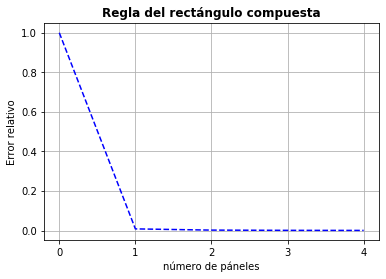

In [31]:
# Grafica: error relativo vs número de páneles
import matplotlib.pyplot as plt

plt.plot(err_tra[:,1], 'b--')
plt.xlabel('número de páneles'); plt.ylabel('Error relativo')
plt.title('Regla del rectángulo compuesta', fontweight="bold")
plt.xticks(np.arange(0, 5, step=1))
plt.grid(True)

plt.show()

# Gráfica de comparación de errores relativos entre los computados por las reglas compuestas del rectángulo y del trapecio.

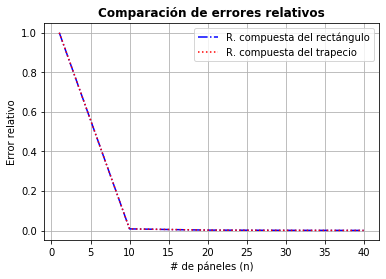

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

x_ax = np.array(n)

plt.plot(x_ax, err_rec[:,1], '-.b', x_ax, err_tra[:,1], ':r')
plt.legend(('R. compuesta del rectángulo', 'R. compuesta del trapecio'), loc = 0)
plt.xlabel('# de páneles (n)'); plt.ylabel('Error relativo')
plt.title('Comparación de errores relativos', fontweight="bold")
plt.grid(True)

plt.show()